In [71]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [72]:
os.chdir("D:\\Letsupgrade_AIML\\LetsUpgrade Github notes\\AIML\\AI-ML-Aug-2020\\Day-17")
mtcars=pd.read_csv("mtcars.csv")
mtcars.head(n=10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Taking only "hp" column data into seperate dataframe to calculate outliers and z-score.

In [79]:
# Calculating mean for the "hp" column in the mtcars dataset
mtcars_hp=list(mtcars["hp"])
mtcars_hp_mean=np.mean(mtcars_hp)
mtcars_hp_mean

146.6875

In [80]:
#Calculating standard deviation for the "hp" column in the dataset
mtcars_hp_std=np.std(mtcars["hp"])
mtcars_hp_std

67.48307079371833

### zscore=(x-mean)/standarddeviation
### Outliers are identified from z-score and need to mention threshold value to identify outliers

In [67]:
# Assuming threshold value with 3
outliers_hp=[]
for i in mtcars["hp"]:
    zscore=(i-mtcars_hp_mean)/mtcars_hp_std
#     print(zscore)
    if np.abs(zscore)>3:
        outliers_hp.append(i)
print("outliers for mtcars dataset of hp column are:",outliers_hp)
# print(type(mtcars_hp_mean))

outliers for mtcars dataset of hp column are: []


### For threshold value 3, there are no outliers for this dataset of "hp" column
### So, when taking threshold value as 2, then there will be identifying outliers in mtcars dataset of "hp" column

In [82]:
outliers_hp=[]
for i in mtcars["hp"]:
    zscore=(i-mtcars_hp_mean)/mtcars_hp_std
    if np.abs(zscore)>2:
        outliers_hp.append(i)
print("outliers for mtcars dataset of hp column are:",outliers_hp)

outliers for mtcars dataset of hp column are: [335]


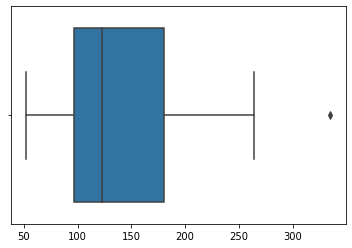

In [83]:
sns.boxplot(x=mtcars_hp)
plt.show()

### InterQuartile Range
### lower bound= q1-1.5(q3-q1)
### upper bound=q3-1.5(q3-q1)

In [28]:
mtcars_hp=list(mtcars["hp"])
mtcars_hp=sorted(mtcars_hp)
mtcars_hp

[52,
 62,
 65,
 66,
 66,
 91,
 93,
 95,
 97,
 105,
 109,
 110,
 110,
 110,
 113,
 123,
 123,
 150,
 150,
 175,
 175,
 175,
 180,
 180,
 180,
 205,
 215,
 230,
 245,
 245,
 264,
 335]

In [29]:
quartile1_hp,quartile3_hp=np.percentile(mtcars_hp,[25,75])
print(quartile1_hp,quartile3_hp)

96.5 180.0


### Calculation of InterQuartileRange for "hp" column in mtcars dataset
### lowerbound value=q1-1.5(q3-q1)
### upperbound value=q3-1.5(q3-q1)
### Inter quartile=q3-q1

In [30]:
interquartile_hp=quartile3_hp-quartile1_hp
interquartile_hp

83.5

In [41]:
lowerbound_hp=quartile1_hp-(1*interquartile_hp)
upperbound_hp=quartile3_hp+(1*interquartile_hp)
print(lowerbound_hp,upperbound_hp)

13.0 263.5


### By using boxplot , we can identify the IQR and mean, and also outlier for "hp" column in mtcars dataset

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# x=[upperbound_hp,lowerbound_hp]
# plt.show()
plt.boxplot(mtcars_hp)
plt.show()

### Question 2:
### ● Using the Boston data set from sklearn, find out the Outlier and treat them.

In [19]:
# Importing the boston dataset from scikitlearn library
import sklearn
from sklearn.datasets import load_boston
boston=load_boston()
boston_data=pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_data.head(n=10)
boston_data["TARGET"]=pd.Series(boston.target)
boston_data.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [102]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Target column in boston dataset denotes Median value of owner-occupied homes in $1000

### taking target column for calculating z-score and outliers

In [88]:
boston_target=list(boston_data["TARGET"])
boston_target[0:5]

[24.0, 21.6, 34.7, 33.4, 36.2]

In [90]:
boston_target_mean=np.mean(boston_target)
boston_target_mean

22.532806324110677

In [91]:
boston_target_std=np.std(boston_target)
boston_target_std

9.188011545278203

### Boxplot for target column in boston house dataset

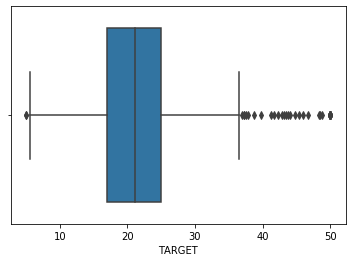

In [112]:
sns.boxplot(x=boston_data["TARGET"])
plt.show()

### Calculation of zscore for target column in boston dataset, for obtaining outliers
### Based on the boxplot, the threshold value for the zscore varied

In [98]:
outliers_boston_target=[]
for i in boston_target:
    zscore_target=(i-boston_target_mean)/boston_target_std
#     print(zscore)
    if np.abs(zscore_target)>1.5:
        outliers_boston_target.append(i)
print("outliers for boston dataset of target column are:",outliers_boston_target)

outliers for boston dataset of target column are: [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 36.4, 50.0, 42.3, 48.5, 50.0, 44.8, 50.0, 37.6, 46.7, 41.7, 48.3, 42.8, 44.0, 50.0, 43.1, 48.8, 36.5, 50.0, 43.5, 45.4, 46.0, 50.0, 37.3, 50.0, 50.0, 50.0, 50.0, 50.0, 7.2, 7.4, 8.5, 5.0, 6.3, 5.6, 7.2, 8.3, 8.5, 5.0, 7.0, 7.2, 7.5, 8.4, 8.3, 8.7, 8.4, 7.0, 8.1]


### Calculation of IQR for target column in boston dataset

In [116]:
quartile1_target,quartile3_target=np.percentile(boston_target,[25,75])
print(quartile1_target,quartile3_target)

17.025 25.0


In [124]:
IQR_target=quartile3_target-quartile1_target
print("InterQuartileRange for target column in boston dataset is:",IQR_target)

InterQuartileRange for target column in boston dataset is: 7.975000000000001


In [120]:
lowerbound_target=quartile1_target-(1.5*IQR_target)
upperbound_target=quartile3_target-(1.5*IQR_target)
print("Upperbound and lowerbound values are:")
print(lowerbound_target,upperbound_target)

Upperbound and lowerbound values are:
5.0624999999999964 13.037499999999998


### Calculation of zscore for DIS column-"weighted distances to five Boston employment centres" in boston dataset, for obtaining outliers
### Based on the boxplot, the threshold value for the zscore varied

In [108]:
boston_distances=list(boston_data["DIS"])
boston_distances[0:5]

[4.09, 4.9671, 4.9671, 6.0622, 6.0622]

In [103]:
boston_distances_mean=np.mean(boston_distances)
boston_distances_mean

3.795042687747036

In [104]:
boston_distances_std=np.std(boston_distances)
boston_distances_std

2.1036283563444593

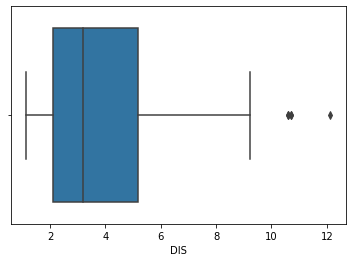

In [111]:
#Box plot for DIS column in boston housing dataset
sns.boxplot(x=boston_data["DIS"])
plt.show()

In [115]:
#Calculation of z-score and oultiers
zscore_distances=[]
outliers_boston_distances=[]
for i in boston_distances:
    zscore_distance=(i-boston_distances_mean)/boston_distances_std
    zscore_distances.append(zscore_distance)
    if(zscore_distance)>3:
        outliers_boston_distances.append(i)
        
print("outliers for boston dataset of DIS column are:",outliers_boston_distances)
# print("zscore for boston dataset of DIS column are:",zscore_distances)

outliers for boston dataset of DIS column are: [10.7103, 10.7103, 12.1265, 10.5857, 10.5857]


### Calculation of IQR for DIS column in boston dataset

In [123]:
quartile1_dis,quartile3_dis=np.percentile(boston_distances,[25,75])
print(quartile1_dis,quartile3_dis)

2.100175 5.1884250000000005


In [125]:
IQR_dis=quartile3_dis-quartile1_dis
print("InterQuartileRange for DIS column in boston dataset is:",IQR_dis)

InterQuartileRange for DIS column in boston dataset is: 3.0882500000000004


In [135]:
lowerbound_dis=quartile1_dis-(1.5*IQR_dis)
upperbound_dis=quartile3_dis-(1.5*IQR_dis)
print("Upperbound and lowerbound values are:")
print(lowerbound_dis,upperbound_dis)

Upperbound and lowerbound values are:
-2.5322000000000005 0.5560499999999999
